### Objective: Classification for Wine Quality (Binary Classification)

This project implements classification techniques using two different models: 

**Random Forest** and **XGBoost** <br> 
The workflow includes data preprocessing, model training, <br>
hyperparameter optimization, evaluation, and visualization of the results.

#### Steps
1: Data Exploration and Preprocessing <br>
2: Model Training with Random Forest and XGBoost <br>
3: Evaluation Metrics and Visualization <br>
4: Deliverables <br>
<br>
<br>

1. **Data Preparation**
    - Load the wine quality dataset.
    - Analyze statistics and correlations of features.
    - Transform multiple classifications of wine quality
     to binary classification.
    - Standard Scaling ($\mu$ = 0, $\sigma$ = 1)

2. **Model Training**
    - Split the dataset into training and testing sets.
    - Train with Random Forest (w/o grid search) 
    and XGBoost with optuna.

3. **Evaluation Metrics and Visualization**
    - Evaluate precision, recall, and F1 scores
    - Visualized ROC curve, confusion matrix, and
    feature importance 


4. **Deliverables**
    - RF, and XGBoost trained models were saved to 'pkl'
    files, and reproducing test results

In [6]:
# check python vsersion
!python --version

Python 3.12.2


#### Install require libraries
    - create requirements.txt
    - install libraries: pip install -r requirements.txt 

In [46]:
%%writefile requirements.txt
pandas==2.2.2
numpy==1.26.4
seaborn==0.13.2
matplotlib==3.9.2
scikit-learn==1.5.2
xgboost==2.1.1
optuna==4.0.0
shap==0.46.0
joblib==1.4.2

Overwriting requirements.txt


In [47]:
!pip install -r requirements.txt

In [1]:
#### Import all libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from xgboost import XGBClassifier
import optuna
import shap
import joblib

#### Step 1. 
- Download dataset
- Exploratory Data Analysis (EDA)
- The columns and their corresponding data types
- Check missing values
- Descriptive statistics analysis
- Target (quality) Variable Distribution
- Correlation between features

In [2]:
# Download dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# The columns and their corresponding data types
print("\nDataset info:")
data.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())



Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
#  The columns and their corresponding data types
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000         

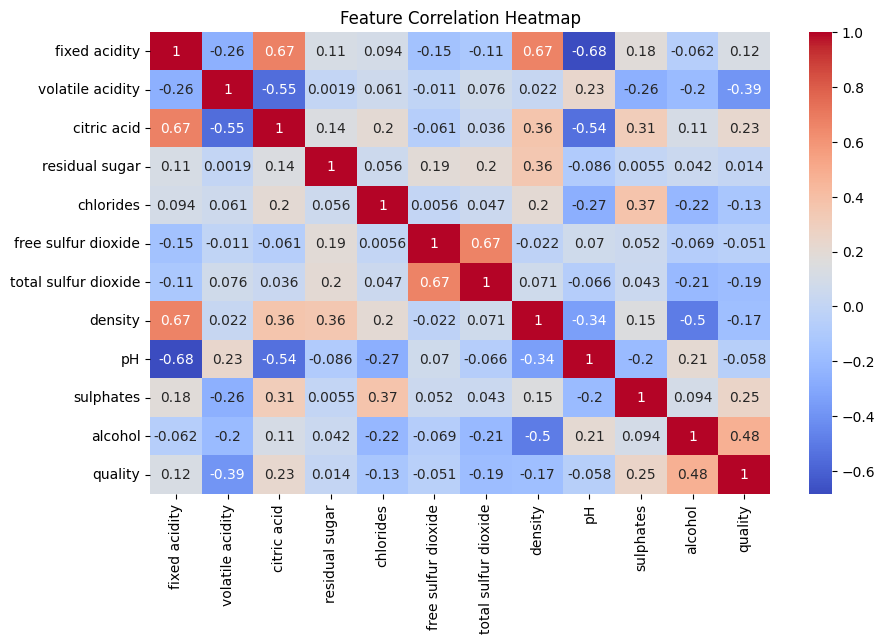

In [6]:
# Correlation matrix heatmap plot

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### remarks of correlation heatmap:
-  “density” has strong positive correlation with “residual sugar” whereas it has strong negative correlation with “alcohol”.
- “free sulphur dioxide” and “citric acid” has almost no correlation with “quality”.

#### Towards to classifications: check target (quality) variable distribution.


In [7]:
#  Target (quality) Variable Distribution

## show quality score in descending order.
print(data.quality.unique())


[5 6 7 4 8 3]


In [8]:
#  Target (quality) Variable Distribution

## count of each quality score 
print(data.quality.value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


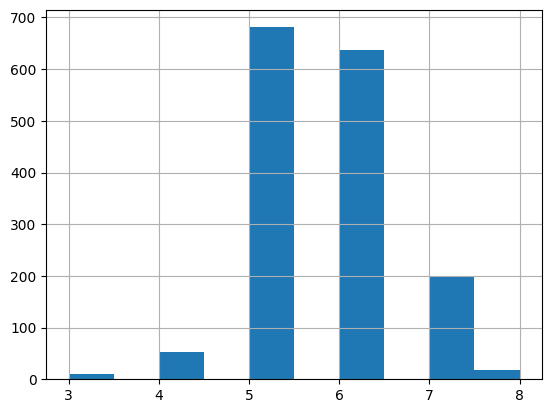

In [10]:
#  Target (quality) Variable Distribution

## plot each quality score 
data['quality'].hist()
plt.show()

#### Feature Engineering and Target Encoding
   - Binary Classification: Good (quality >= 7) vs. Not Good (quality < 7)

In [11]:
data['quality_label'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [15]:
# count 0: not good quality, 1: good quality

data['quality_label'].value_counts()

quality_label
0    1382
1     217
Name: count, dtype: int64

In [16]:
# Split features and target

X = data.drop(columns=['quality', 'quality_label'])
y = data['quality_label']


In [17]:
# Standardize features (mu = 0, sigma=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Splitting the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

#### Random Forest Prediction

In [19]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
y_rf_prob = rf_model.predict_proba(X_test)[:, -1] 

print(classification_report(y_test, y_rf_pred))

# Save Random Forest model for later productions
joblib.dump(rf_model, 'rf_model.pkl')

### 
# Random Forest with Grid Search
# 
#rf_model = RandomForestClassifier(random_state=42)
#param_grid = {
#    'n_estimators': [50, 200, 500, 10000],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10]
#}
#grid_search = GridSearchCV(rf_model, param_grid, cv=10, 
#                           scoring='accuracy', verbose=0, n_jobs=-1)
#grid_search.fit(X_train, y_train)
#
## Best model
#best_rf_model = grid_search.best_estimator_
#print("\nBest model parameters:")
#print(grid_search.best_params_)
#
## Save best Random Forest model
#joblib.dump(best_rf_model, 'rf_model.pkl')
#
## Step 6: Evaluation
## Predictions
#y_pred_rf = best_rf_model.predict(X_test)
## Probability estimates
#y_prob_rf = best_rf_model.predict_proba(X_test)[:, -1] 
#
#print(classification_report(y_test, y_pred_rf))
#
# Grid search did not improve results.
# Best model parameters:
# {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
#
# These results did not improve significantly thean default settings
#               precision    recall  f1-score   support
#
#            0       0.96      0.97      0.97       290
#            1       0.69      0.60      0.64        30
#
#     accuracy                           0.94       320
#    macro avg       0.83      0.79      0.80       320
# weighted avg       0.93      0.94      0.94       320
#
# 

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       290
           1       0.67      0.60      0.63        30

    accuracy                           0.93       320
   macro avg       0.81      0.78      0.80       320
weighted avg       0.93      0.93      0.93       320



['rf_model.pkl']

#### XGBoost prediction
    - hyper-parameter optimization using optuna
    - Using optimized parameters, perform XGBoost prediction

In [22]:
# define hyper-paramter search object
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
    }
    model = XGBClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Train XGBoost with best parameters
best_params = study.best_params
xgb_model = XGBClassifier(**best_params, random_state=42)
xgb_model.fit(X_train, y_train)

joblib.dump(xgb_model, 'xgb_model.pkl')


y_xgb_pred = xgb_model.predict(X_test)
# Probability estimates
y_xgb_prob = xgb_model.predict_proba(X_test)[:, -1] 

print(classification_report(y_test, y_xgb_pred))


# Save XGBoost model for productions
joblib.dump(xgb_model, 'xgb_model.pkl')

[I 2024-12-04 09:07:48,080] A new study created in memory with name: no-name-7063ad9d-f2fb-416e-82eb-1bda65877d63


[I 2024-12-04 09:07:48,205] Trial 0 finished with value: 0.89375 and parameters: {'max_depth': 3, 'learning_rate': 0.07009583057784634, 'n_estimators': 267, 'colsample_bytree': 0.6883396025400587, 'subsample': 0.5922324869140988, 'gamma': 3.0965520774658932, 'reg_alpha': 0.07924210233547502, 'reg_lambda': 0.8792494364935731}. Best is trial 0 with value: 0.89375.
[I 2024-12-04 09:07:48,251] Trial 1 finished with value: 0.903125 and parameters: {'max_depth': 4, 'learning_rate': 0.17846975220492012, 'n_estimators': 103, 'colsample_bytree': 0.6566728812657086, 'subsample': 0.5927767326019351, 'gamma': 4.993470888029997, 'reg_alpha': 0.04592464332137591, 'reg_lambda': 0.04255720919604289}. Best is trial 1 with value: 0.903125.
[I 2024-12-04 09:07:48,303] Trial 2 finished with value: 0.909375 and parameters: {'max_depth': 5, 'learning_rate': 0.12748894982084907, 'n_estimators': 118, 'colsample_bytree': 0.9013089292298723, 'subsample': 0.7873226946916172, 'gamma': 4.0191902094407315, 'reg_alp

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       290
           1       0.68      0.70      0.69        30

    accuracy                           0.94       320
   macro avg       0.82      0.83      0.83       320
weighted avg       0.94      0.94      0.94       320



['xgb_model.pkl']

#### Plot results
    - ROC curve
    - Confusion Matrix
    - Feature Importance
    - Shap values

In [26]:
# Define ROC curve plot
def plot_roc(y_test,y_prob):
    false_pos_rate, true_pos_rate, proba = roc_curve(np.array(y_test), y_prob)
    plt.figure()
    plt.plot([0,1], [0,1], linestyle="--") # plot random curve
    plt.plot(false_pos_rate, true_pos_rate, marker=".", 
             label=f"AUC = {roc_auc_score(np.array(y_test), y_prob)}")
    plt.title("ROC Curve")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

In [27]:
# Define Confusion Matrix plot
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    print('Confusion matrix\n\n', cm)

    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                     index=['Predict Positive:1', 'Predict Negative:0'])

    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### Plot ROC curve

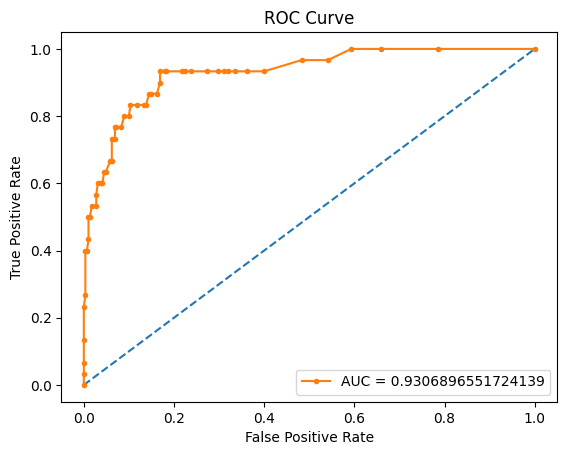

In [28]:
## Plot RF ROC Curv of RF result
plot_roc(y_test, y_rf_prob)

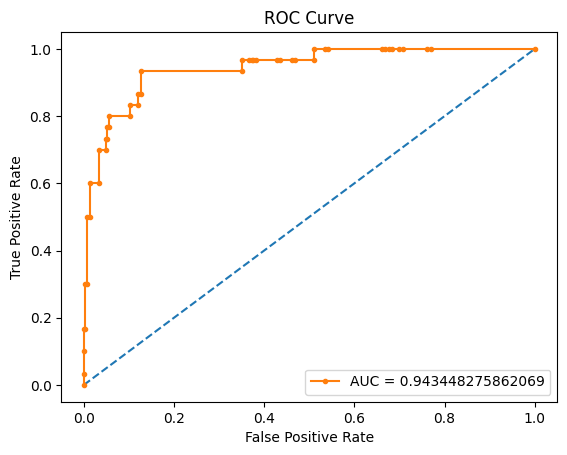

In [29]:
#Plot ROC curv of XGB
plot_roc(y_test, y_xgb_prob)

##### Remarks: The above figures, XGB prediction has slight higher accuracy.

#### Plot Confusion Matrix

Confusion matrix

 [[281   9]
 [ 12  18]]


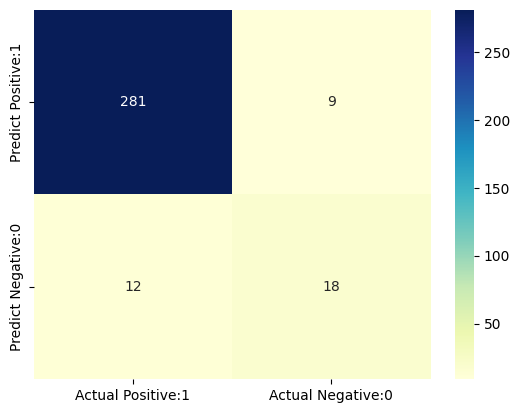

In [30]:
#Plot Confusion Matrix of RF
plot_cm(y_test, y_rf_pred)

Confusion matrix

 [[280  10]
 [  9  21]]


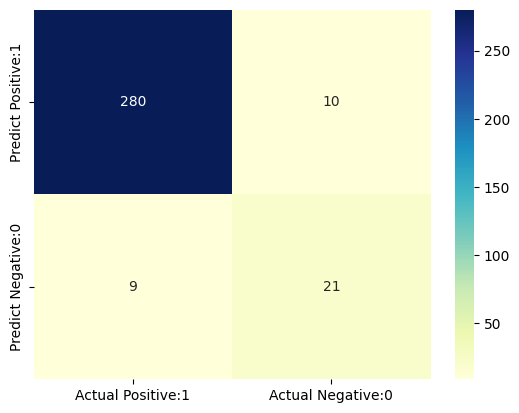

In [31]:
#Plot Confusion Matrix of xgb
plot_cm(y_test, y_xgb_pred)

#### Plot Feature imoportance

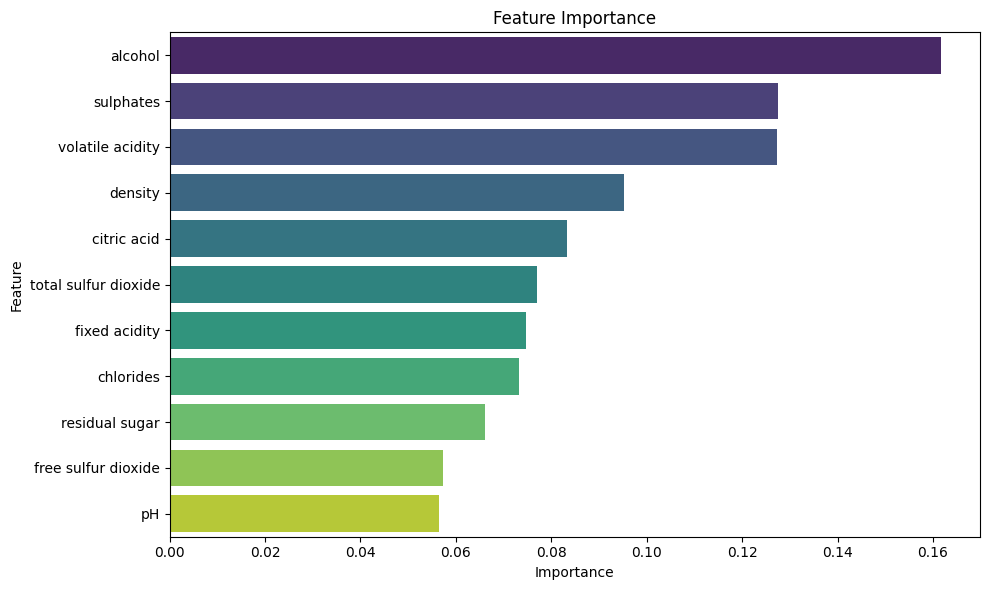

In [32]:
# Step 8: Feature Importance
# view the feature scores
# Plot feature importance of RF

importances = rf_model.feature_importances_
feature_names = data.drop(columns=['quality', 'quality_label']).columns

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, 
            hue='Feature', dodge=False, palette='viridis', legend=False)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

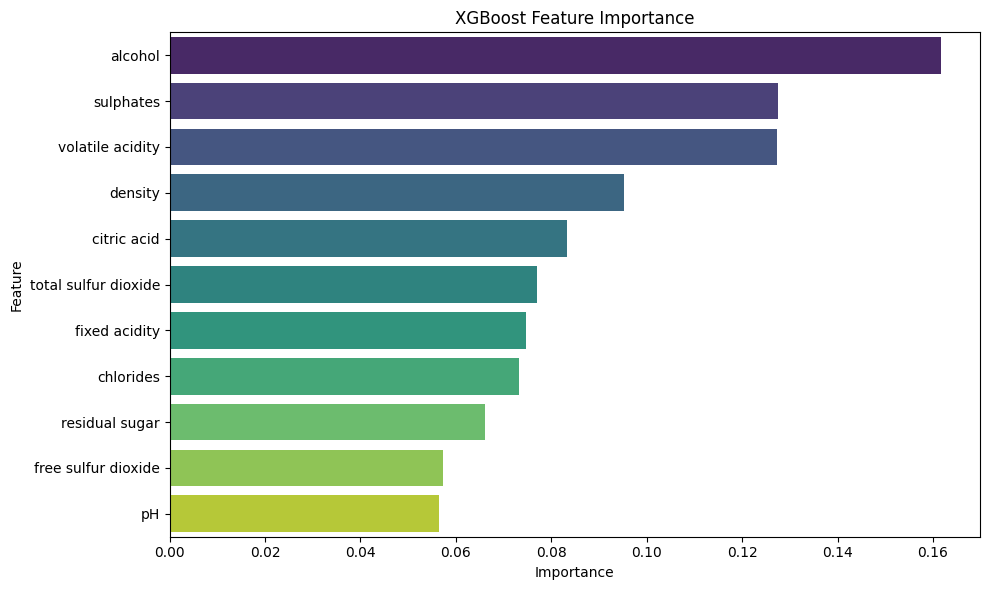

In [33]:
# Plot Feature Importance of XGBoosy

xgb_importances = xgb_model.feature_importances_
xgb_feature_importance_df = pd.DataFrame({
    'Feature': data.drop(columns=['quality', 'quality_label']).columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

# Plot XGBoost Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, 
            hue='Feature', dodge=False, palette='viridis', legend=False)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


##### Remarks
- **Feature Importance:** The order of feature importance between RF and XGBoost is consistent.
- **Application:** These values can effectively guide **Feature Engineering** to enhance model performance.

#### Shap Value Plot
- Since RF and XGBoost of Feature Importance was consistent.
- Only XGBoost Shap plot is shown 

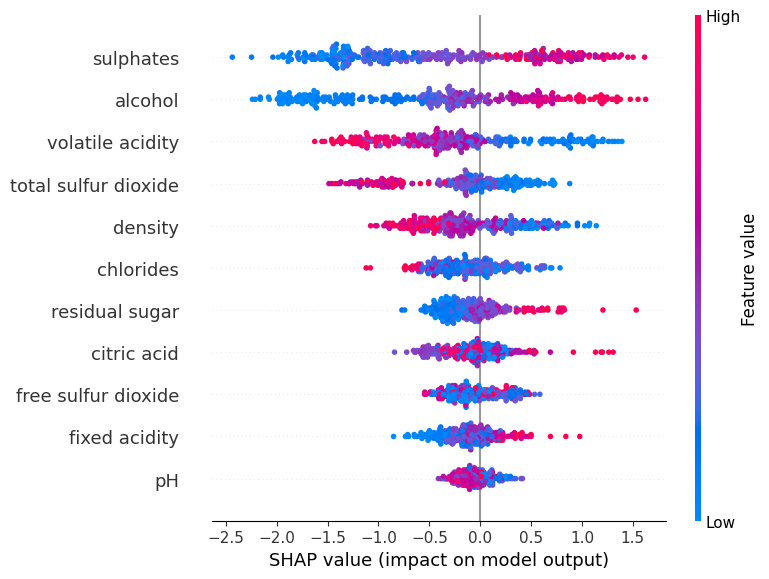

In [34]:
# Prepare the feature names
feature_names = data.drop(columns=['quality', 'quality_label']).columns.tolist()

# Create SHAP explainer
explainer = shap.Explainer(xgb_model, feature_names=feature_names)

# Compute SHAP values
shap_values = explainer(X_test.reshape(X_test.shape[0], -1))

# SHAP Summary Plot
shap.summary_plot(shap_values.values, X_test.reshape(X_test.shape[0], -1), feature_names=feature_names)


##### Remarks
- Sulphates and Alcohol are the important feature and have strong positive impacts with wine quality. 
- Volatile acidity and total sulfur dioxide are important, but they have negative impacts to the quality. 
- **Application:** These values can effectively guide **Feature Engineering** to enhance model performance.

#### Model Reproducibility
    - load save files
    - peform test

In [35]:
# Step 10: Test Model Reproducibility
# Load the saved models
rf_model_loaded = joblib.load('rf_model.pkl')
xgb_model_loaded = joblib.load('xgb_model.pkl')

In [36]:
# Predict with loaded models
# random forest

y_rf_pred_loaded = rf_model_loaded.predict(X_test)
print(classification_report(y_test, y_rf_pred_loaded))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       290
           1       0.67      0.60      0.63        30

    accuracy                           0.93       320
   macro avg       0.81      0.78      0.80       320
weighted avg       0.93      0.93      0.93       320



In [37]:
# Predict with loaded models
# xgboost

y_xgb_pred_loaded = xgb_model_loaded.predict(X_test)
print(classification_report(y_test, y_xgb_pred_loaded))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       290
           1       0.68      0.70      0.69        30

    accuracy                           0.94       320
   macro avg       0.82      0.83      0.83       320
weighted avg       0.94      0.94      0.94       320



#### Remarks: These are reproducing the abov RF and XGBoost results 